(labs:cor22)=
# Properties of the Fourier transform

<hr>

## 📌 Commentaires pour les intervenants

* Il est possible que le module ne soit pas visible.
  Dans ce cas, expliquer que les intensités sont écrasées (l'intensité de la fréquence nulle étant très grande).
  Une solution est d'afficher le logarithme du module (en valeur absolue) :
  c'est en fait une transformation d'histogramme, comme on a vu dans la séance précédente.
 
* Dès qu'ils affichent le résultat pour plusieurs images, discuter avec eux de ce qu'ils observent, et donc interprètent.

<hr>

In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

## Objectives
* manipulation of `fft2` et `fftshift`
* display adequately the magnitude of the Fourier transform to see the details
* observe the effect of a contraction-dilation
* observe the effect of a rotation
* observe the effect of a translation

## Some remarks

* After computing the Fourier transform with `numpy.fft.fft2`,
  use the function `numpy.fft.fftshift` to shift the zero frequencies at the centre of the image.
* The Fourier transform being complex, its display is not straightforward:
  so one need to show its magnitude (`numpy.absolute`) and argument (`numpy.angle`).

## Results

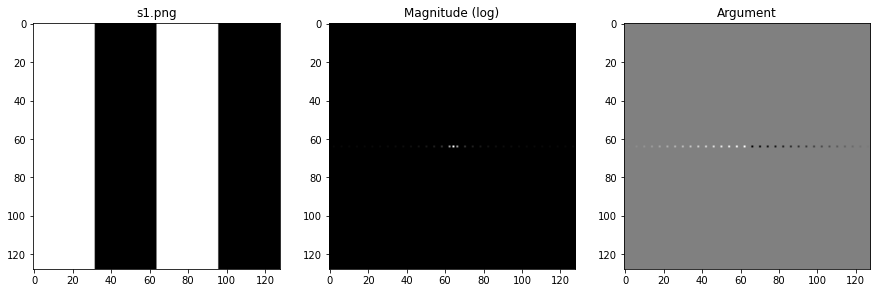

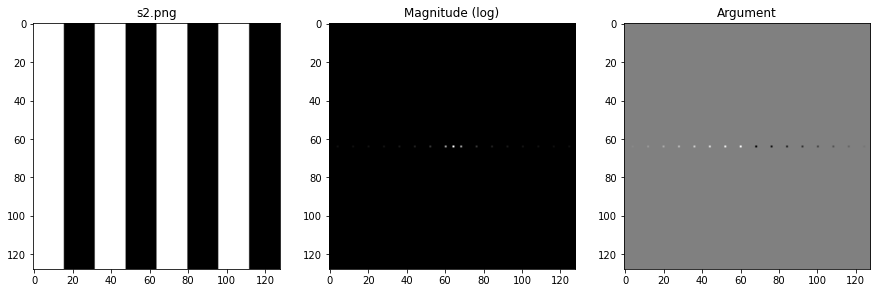

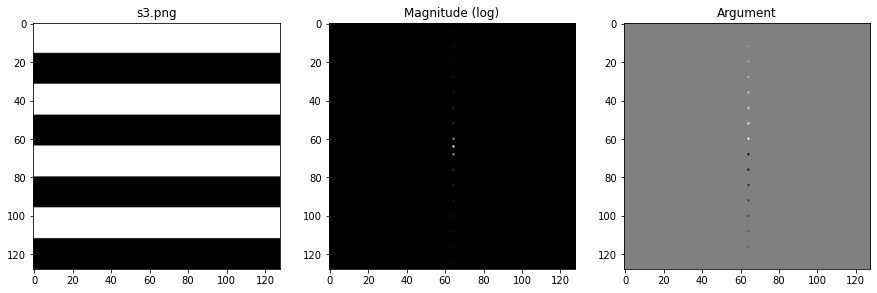

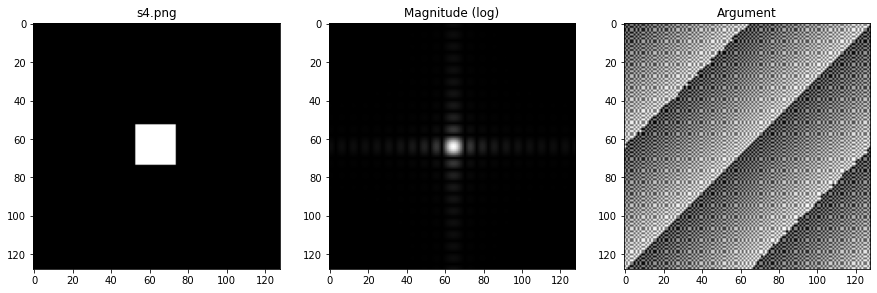

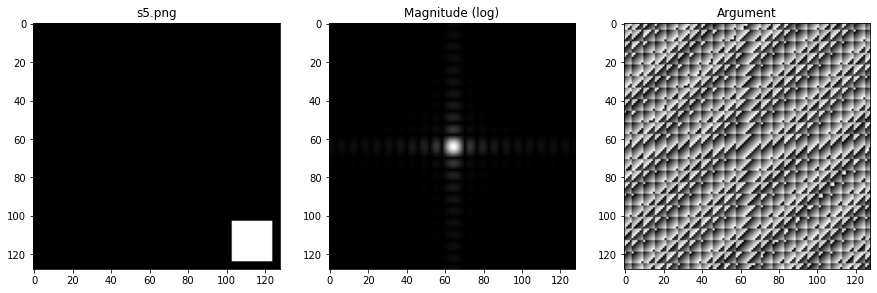

In [2]:
#Supprime les warnings indiquant les log(0)
import warnings
warnings.filterwarnings('ignore')

for i in range(5):
    
    # Chargement
    img = "s%d.png" % (i+1)
    f = io.imread(img)

    # Transformée de Fourier
    F = np.fft.fft2(f);
    
    # Ramener les basses fréquences au centre de l'image
    F = np.fft.fftshift(F)
    
    # Affichage
    # Pensez à afficher le logarithme du module afin de voir quelque chose
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(f, cmap="gray")
    plt.title(img)
    plt.subplot(1,3,2)
    plt.imshow(np.absolute(F), cmap="gray") # log is useless here
    plt.title("Magnitude (log)")
    plt.subplot(1,3,3)
    plt.imshow(np.angle(F), cmap="gray")
    plt.title("Argument")    

This exercise highlights some properties of the Fourier transform.

* The images `s1` and `s2` show that a "contraction" in the spatial domain
  (the bands from `s1` to `s2` get closer and narrower) results in "dilation" in the frequency domain
  (the points diverge, even if the pattern remains overall the same, whether on the magnitude and the argument).
* A rotation in the spatial domain results in an identical rotation in the frequency domain
  (`s3` is a rotation of 90 ° of `s2`).
* A spatial shift implies a modification on the argument (but not on the magnitude), hence the name of _phase shift_
   (the white square of the images `s4` and `s5` has been translated).